In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load
df_train = pd.read_csv("/home/walter/Documents/personal_projects/new-titan/data/raw/train.csv", header=0)
df_test = pd.read_csv("/home/walter/Documents/personal_projects/new-titan/data/raw/test.csv", header=0)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory

In [3]:
# nas
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Sex

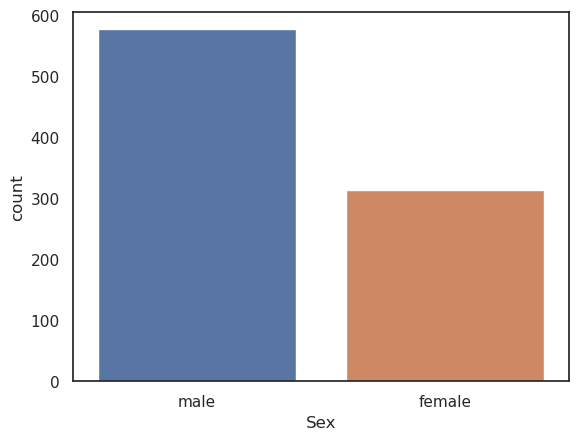

In [5]:
# sex. frequencies
sns.set_theme(style='white')
fig, ax = plt.subplots()

graf = sns.countplot(data=df_train, x='Sex', ax=ax)

In [6]:
cross = pd.crosstab(index=df_train['Sex'], columns=df_train['Survived'], normalize='index')
cross

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


La probabilidad de sobrevivir siendo mujer es del 74%, mientras que la probabilidad de sobrevivir siendo hombre es del 19%. `Sex` es un buen predictor de la sobrevivencia del pasajero.

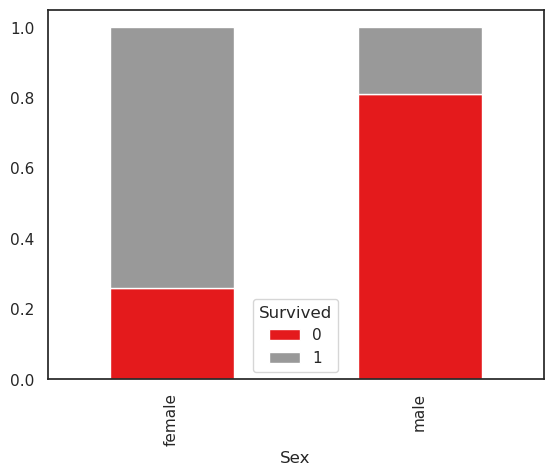

In [7]:
fig, ax = plt.subplots()
graf = cross.plot(kind='bar', stacked=True, ax=ax, colormap='Set1')

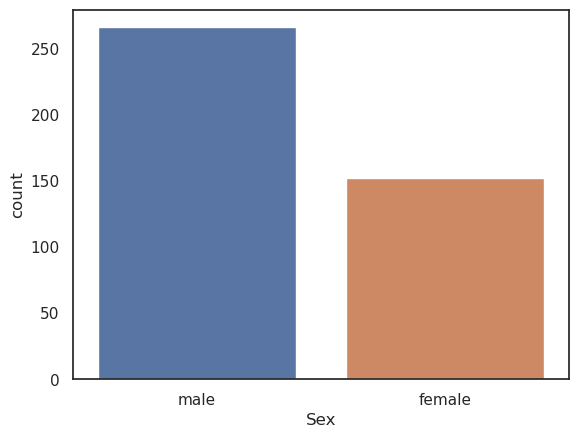

In [8]:
# sex. frequencies (revisión datos testing)
sns.set_theme(style='white')
fig, ax = plt.subplots()

graf = sns.countplot(data=df_test, x='Sex', ax=ax)

# Pclass

In [10]:
df_train['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [14]:
cross = pd.crosstab(df_train['Pclass'], df_train['Survived'], normalize='index')
cross

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


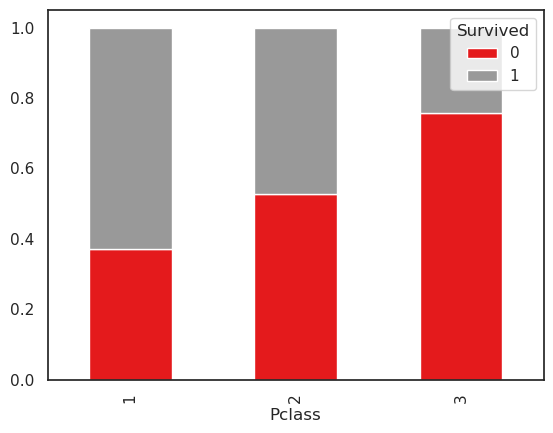

In [15]:
fig, ax = plt.subplots()
graf = cross.plot(kind='bar', stacked=True, ax=ax, colormap='Set1')

Existe una relación entre la clase en la que estaba la persona y la probabilidad de morir. De primera clase, murió el 40%, pero de la tercera el 65%.

# Age

<AxesSubplot:xlabel='Survived', ylabel='Age'>

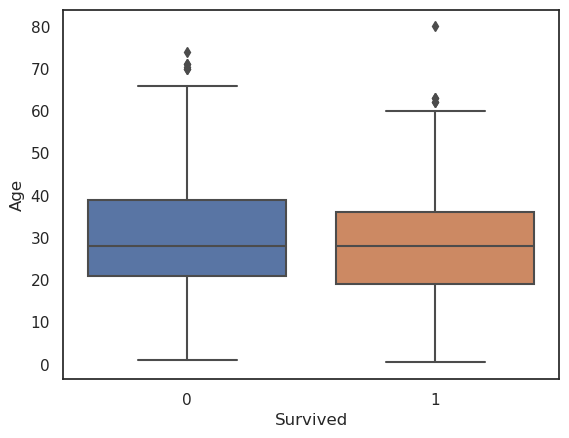

In [17]:
sns.boxplot(x=df_train['Survived'], y=df_train['Age'])

In [18]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
df_train.loc[df_train['Survived'] == 0, 'Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [20]:
df_train.loc[df_train['Survived'] == 1, 'Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

La gente de edades mayores tendió a fallecer. Existe una leve capacidad explicativa en la variable.

Tenemos aquí el tema de la imputación. Es relavante generar un método de imputación que respete la edad de la persona (la media no parece óptimo).



# Sibs-Parch

Queda

# Fare

In [21]:
df_train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

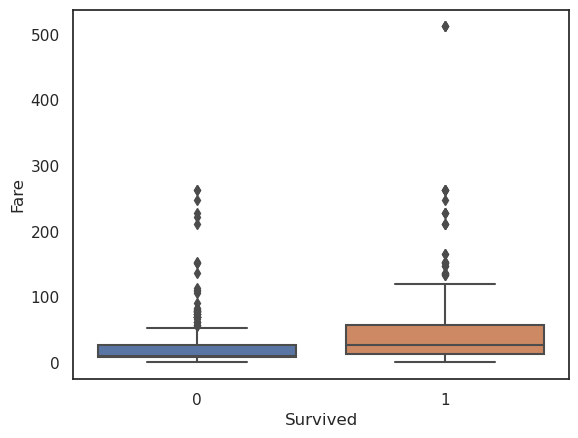

In [22]:
sns.boxplot(x=df_train['Survived'], y=df_train['Fare'])

Al igual que con la clase, existe evidencia de que los pasajeros con Fare mayor tenían mayor probabilidad de sobrevivir. Posee capacidad explicativa.

# Embarked

In [25]:
cross = pd.crosstab(df_train['Embarked'], df_train['Survived'], normalize='index')
cross

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


<AxesSubplot:xlabel='Embarked'>

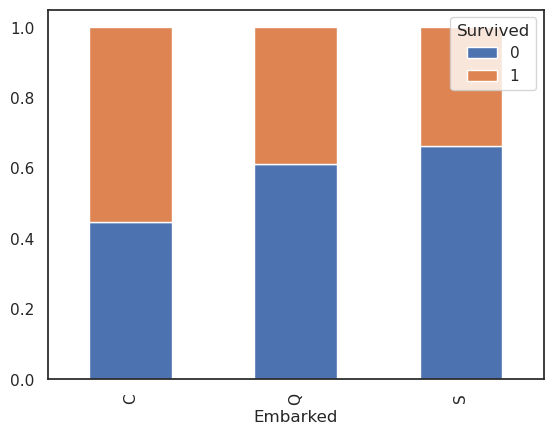

In [26]:
cross.plot(kind='bar', stacked=True)

Pareciera que existe capacidad explicativa del fallecimiento de las personas dependiendo de su lugar de embarque. Esto puede estar relacionado tanto a la posición dentro del barco así como a la condición socioeconómica predominante de las personas que embarcaban en cierto lugar. Posee capacidad explicativa.